<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [ ]:
import tensorflow as tf
import numpy as np
import requests
import io
from sklearn.model_selection import train_test_split


response = requests.get('https://github.com/marianvinas/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true')
response.raise_for_status()
data = np.load(io.BytesIO(response.content))

X = data['arr_0']
y = data['arr_1']
print(X.shape, y.shape)

(100000, 784) (100000,)


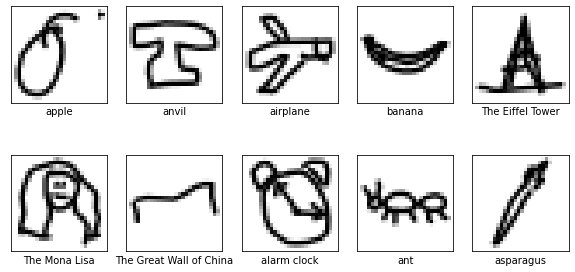

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is our perceptron from Monday's by-hand: 
model = Sequential()
model.add(Dense(units=323, activation='relu', input_dim=784, name='input_dense_32'))
model.add(Dense(units=323, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_dense_32 (Dense)       (None, 323)               253555    
_________________________________________________________________
dense_2 (Dense)              (None, 323)               104652    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3240      
Total params: 361,447
Trainable params: 361,447
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline = model.fit(X, y,
                     epochs=5,
                     validation_split=0.2)

Epoch 1/5
2500/2500 [==============================] - 12s 5ms/step - loss: 0.4993 - accuracy: 0.8524 - val_loss: 0.5528 - val_accuracy: 0.8384
Epoch 2/5
2500/2500 [==============================] - 12s 5ms/step - loss: 0.4654 - accuracy: 0.8618 - val_loss: 0.5718 - val_accuracy: 0.8374
Epoch 3/5
2500/2500 [==============================] - 12s 5ms/step - loss: 0.4435 - accuracy: 0.8691 - val_loss: 0.5467 - val_accuracy: 0.8485
Epoch 4/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4254 - accuracy: 0.8746 - val_loss: 0.5668 - val_accuracy: 0.8466
Epoch 5/5
2500/2500 [==============================] - 14s 6ms/step - loss: 0.4053 - accuracy: 0.8791 - val_loss: 0.6049 - val_accuracy: 0.8503


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# fit the model
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

(100000, 784) (100000,)
(80000, 784) (20000, 784) (80000,) (20000,)
Accuracy: 0.857


In [ ]:
# X Variable Types
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

#X_train = X_train.reshape((20000, 784))
#X_test = X_test.reshape((10000, 784))
#print(X_train.shape, X_test.shape)

#X_train = X_train.reshape(X_train.shape[0], 28*28)
#X_test = X_test.reshape(X_test.shape[0], 28*28)

In [ ]:
##### Your Code Here #####

#def create_model(...):
  
  #return model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=0.01):
  opt = SGD(learning_rate=lr)
  model = Sequential([
    Dense(32, activation='relu', input_dim=784),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [ ]:
#Batch Size is 32
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bt_default = model.fit(X_train, y_train,
                       epochs=25,
                       batch_size=32,
                       validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 3s 1ms/step - loss: 1.1845 - accuracy: 0.6335 - val_loss: 0.8929 - val_accuracy: 0.7372
Epoch 2/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.8293 - accuracy: 0.7564 - val_loss: 0.7812 - val_accuracy: 0.7724
Epoch 3/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7491 - accuracy: 0.7814 - val_loss: 0.7277 - val_accuracy: 0.7868
Epoch 4/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6978 - accuracy: 0.7954 - val_loss: 0.6947 - val_accuracy: 0.7928
Epoch 5/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6602 - accuracy: 0.8055 - val_loss: 0.6604 - val_accuracy: 0.8073
Epoch 6/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6307 - accuracy: 0.8141 - val_loss: 0.6403 - val_accuracy: 0.8116
Epoch 7/25
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6061 - accuracy: 0.8206 - val_loss: 0.6176 - val_accuracy:

In [ ]:
model = create_model()

bt_big = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=512,
  validation_data=(X_test, y_test)
)

Epoch 1/25
157/157 [==============================] - 1s 5ms/step - loss: 2.1864 - accuracy: 0.1872 - val_loss: 2.0289 - val_accuracy: 0.2430
Epoch 2/25
157/157 [==============================] - 1s 5ms/step - loss: 1.8748 - accuracy: 0.3401 - val_loss: 1.7159 - val_accuracy: 0.4561
Epoch 3/25
157/157 [==============================] - 1s 5ms/step - loss: 1.5679 - accuracy: 0.5299 - val_loss: 1.4294 - val_accuracy: 0.5735
Epoch 4/25
157/157 [==============================] - 1s 5ms/step - loss: 1.3324 - accuracy: 0.6021 - val_loss: 1.2519 - val_accuracy: 0.6240
Epoch 5/25
157/157 [==============================] - 1s 5ms/step - loss: 1.1933 - accuracy: 0.6407 - val_loss: 1.1432 - val_accuracy: 0.6493
Epoch 6/25
157/157 [==============================] - 1s 5ms/step - loss: 1.1048 - accuracy: 0.6644 - val_loss: 1.0713 - val_accuracy: 0.6770
Epoch 7/25
157/157 [==============================] - 1s 5ms/step - loss: 1.0456 - accuracy: 0.6820 - val_loss: 1.0231 - val_accuracy: 0.6888
Epoch 

In [ ]:
model = create_model()

bt_small = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=8,
  validation_data=(X_test, y_test)
)

Epoch 1/25
10000/10000 [==============================] - 12s 1ms/step - loss: 0.8749 - accuracy: 0.7353 - val_loss: 0.6806 - val_accuracy: 0.7978
Epoch 2/25
10000/10000 [==============================] - 13s 1ms/step - loss: 0.6326 - accuracy: 0.8100 - val_loss: 0.6095 - val_accuracy: 0.8159
Epoch 3/25
10000/10000 [==============================] - 12s 1ms/step - loss: 0.5687 - accuracy: 0.8270 - val_loss: 0.5625 - val_accuracy: 0.8312
Epoch 4/25
10000/10000 [==============================] - 12s 1ms/step - loss: 0.5305 - accuracy: 0.8393 - val_loss: 0.5476 - val_accuracy: 0.8331
Epoch 5/25
10000/10000 [==============================] - 12s 1ms/step - loss: 0.5038 - accuracy: 0.8475 - val_loss: 0.5408 - val_accuracy: 0.8354
Epoch 6/25
10000/10000 [==============================] - 14s 1ms/step - loss: 0.4855 - accuracy: 0.8535 - val_loss: 0.5251 - val_accuracy: 0.8421
Epoch 7/25
10000/10000 [==============================] - 12s 1ms/step - loss: 0.4707 - accuracy: 0.8573 - val_loss: 0

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_big], ["1", ".1", ".001", ".0001"]):
#for exp, result in zip([bt_default, bt_small, bt_big], ["32_", "8_", "512_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.184488,0.633550,0.892942,0.73720,0,1
1,0.829331,0.756450,0.781235,0.77240,1,1
2,0.749051,0.781412,0.727737,0.78685,2,1
3,0.697807,0.795350,0.694676,0.79280,3,1
4,0.660244,0.805525,0.660446,0.80730,4,1


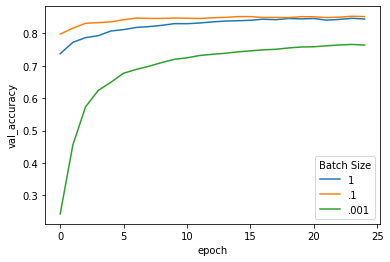

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:
model = create_model(lr=0.75)

lr_high = model.fit(
  X_train, y_train,
  epochs=5,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/5
2500/2500 [==============================] - 4s 1ms/step - loss: 0.9339 - accuracy: 0.7117 - val_loss: 0.7858 - val_accuracy: 0.7771
Epoch 2/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7801 - accuracy: 0.7677 - val_loss: 0.7494 - val_accuracy: 0.7825
Epoch 3/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7554 - accuracy: 0.7782 - val_loss: 0.7270 - val_accuracy: 0.7911
Epoch 4/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7391 - accuracy: 0.7843 - val_loss: 0.7335 - val_accuracy: 0.7944
Epoch 5/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7144 - accuracy: 0.7886 - val_loss: 0.7329 - val_accuracy: 0.7901


In [ ]:

lr_low = model.fit(
  X_train, y_train,
  epochs=5,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7086 - accuracy: 0.7933 - val_loss: 0.7507 - val_accuracy: 0.7947
Epoch 2/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7060 - accuracy: 0.7957 - val_loss: 0.7319 - val_accuracy: 0.7878
Epoch 3/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6966 - accuracy: 0.7956 - val_loss: 0.7071 - val_accuracy: 0.7974
Epoch 4/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.7253 - accuracy: 0.7912 - val_loss: 0.7640 - val_accuracy: 0.7847
Epoch 5/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6859 - accuracy: 0.8004 - val_loss: 0.7963 - val_accuracy: 0.7728


In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, lr_high, lr_low], ["1", ".1", ".001", ".0001"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.184488,0.633550,0.892942,0.73720,0,1
1,0.829331,0.756450,0.781235,0.77240,1,1
2,0.749051,0.781412,0.727737,0.78685,2,1
3,0.697807,0.795350,0.694676,0.79280,3,1
4,0.660244,0.805525,0.660446,0.80730,4,1


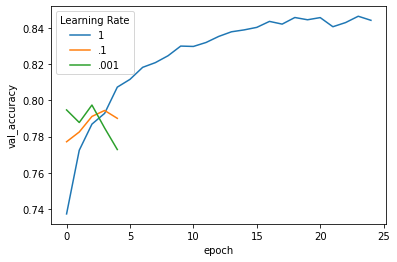

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.